#Task 1 Exploratory Data Analysis:
Video Games Rating By 'ESRB'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#Q1.What is the distribution of ESRB ratings in the dataset? How many games fall into each rating category (E, ET, T, M)? Can you create a bar plot to visualize the distribution?

#Load the Dataset
Video_games_esrb_rating


In [ ]:
df= pd.read_csv("Video_games_esrb_rating.csv")
tdf=pd.read_csv('test_esrb.csv')

Prepare the data

In [ ]:
X = df.iloc[0:]  # the content features start from column 1
y = df['esrb_rating']

Split the data into training and testing sets

In [ ]:
label_encoder = OneHotEncoder(sparse=False)
y = label_encoder.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the model

In [ ]:
label_encoder = OneHotEncoder(sparse=False)
y = label_encoder.fit_transform(y.values.reshape(-1, 1))
model = RandomForestClassifier()
model.fit(X_train, y_train)

Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

Print the evaluation metrics

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)
print("Confusion Matrix:")
print(confusion_mat)

**#Task 2 Classification**

#  Distribution of ESRB ratings

In [ ]:
rating_counts = df['esrb_rating'].value_counts()
print("Distribution of ESRB ratings:\n", rating_counts)

Distribution of ESRB ratings:
 T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64


# Create a bar plot to visualize the distribution

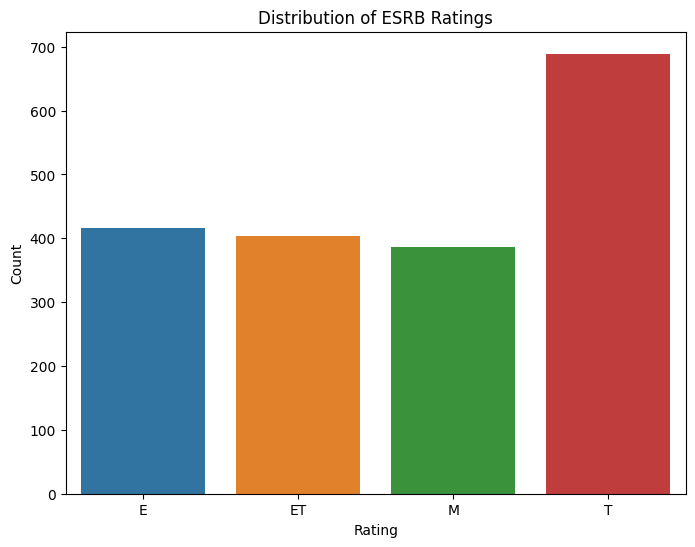

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='esrb_rating', data=df)
plt.title('Distribution of ESRB Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#Q2.Are there any specific ESRB content features that are more prevalent in certain rating categories? Can you analyze the frequency of each content feature for different ESRB ratings and determine if there are any significant differences?

#Frequency of content features for different ESRB ratings

In [ ]:
content_features = df.columns[0:]  # Extract feature names
numeric_columns = df[content_features].select_dtypes(include='number')
rating_content_freq = df.groupby('esrb_rating')[numeric_columns.columns].mean()
print("Frequency of content features for different ESRB ratings:\n", rating_content_freq)

Frequency of content features for different ESRB ratings:
               console  alcohol_reference  animated_blood     blood  \
esrb_rating                                                          
E            0.528846           0.033654        0.000000  0.000000   
ET           0.397022           0.111663        0.022333  0.000000   
M            0.542636           0.002584        0.000000  0.426357   
T            0.451379           0.050798        0.014514  0.387518   

             blood_and_gore  cartoon_violence  crude_humor  drug_reference  \
esrb_rating                                                                  
E                  0.000000          0.000000     0.004808        0.000000   
ET                 0.000000          0.049628     0.066998        0.029777   
M                  0.483204          0.000000     0.012920        0.069767   
T                  0.075472          0.024673     0.100145        0.039187   

             fantasy_violence  intense_violence  ..

In [ ]:
#Q3.Is there a correlation between the presence of certain content features (e.g., violence, sexual content) and the assigned ESRB rating? Can you analyze the correlation between these variables and determine if certain features are strong indicators of a specific rating category?


In [ ]:
print(df.columns)
df.head()
print(content_features)

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')
Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_viole

In [ ]:
Q4.Can you identify any patterns in the relationship between ESRB ratings and the presence of multiple content features? For example, are there certain combinations of features that are more common in specific rating categories?


#Correlation analysis between content features and ESRB rating

<ipython-input-8-886f3e94473a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


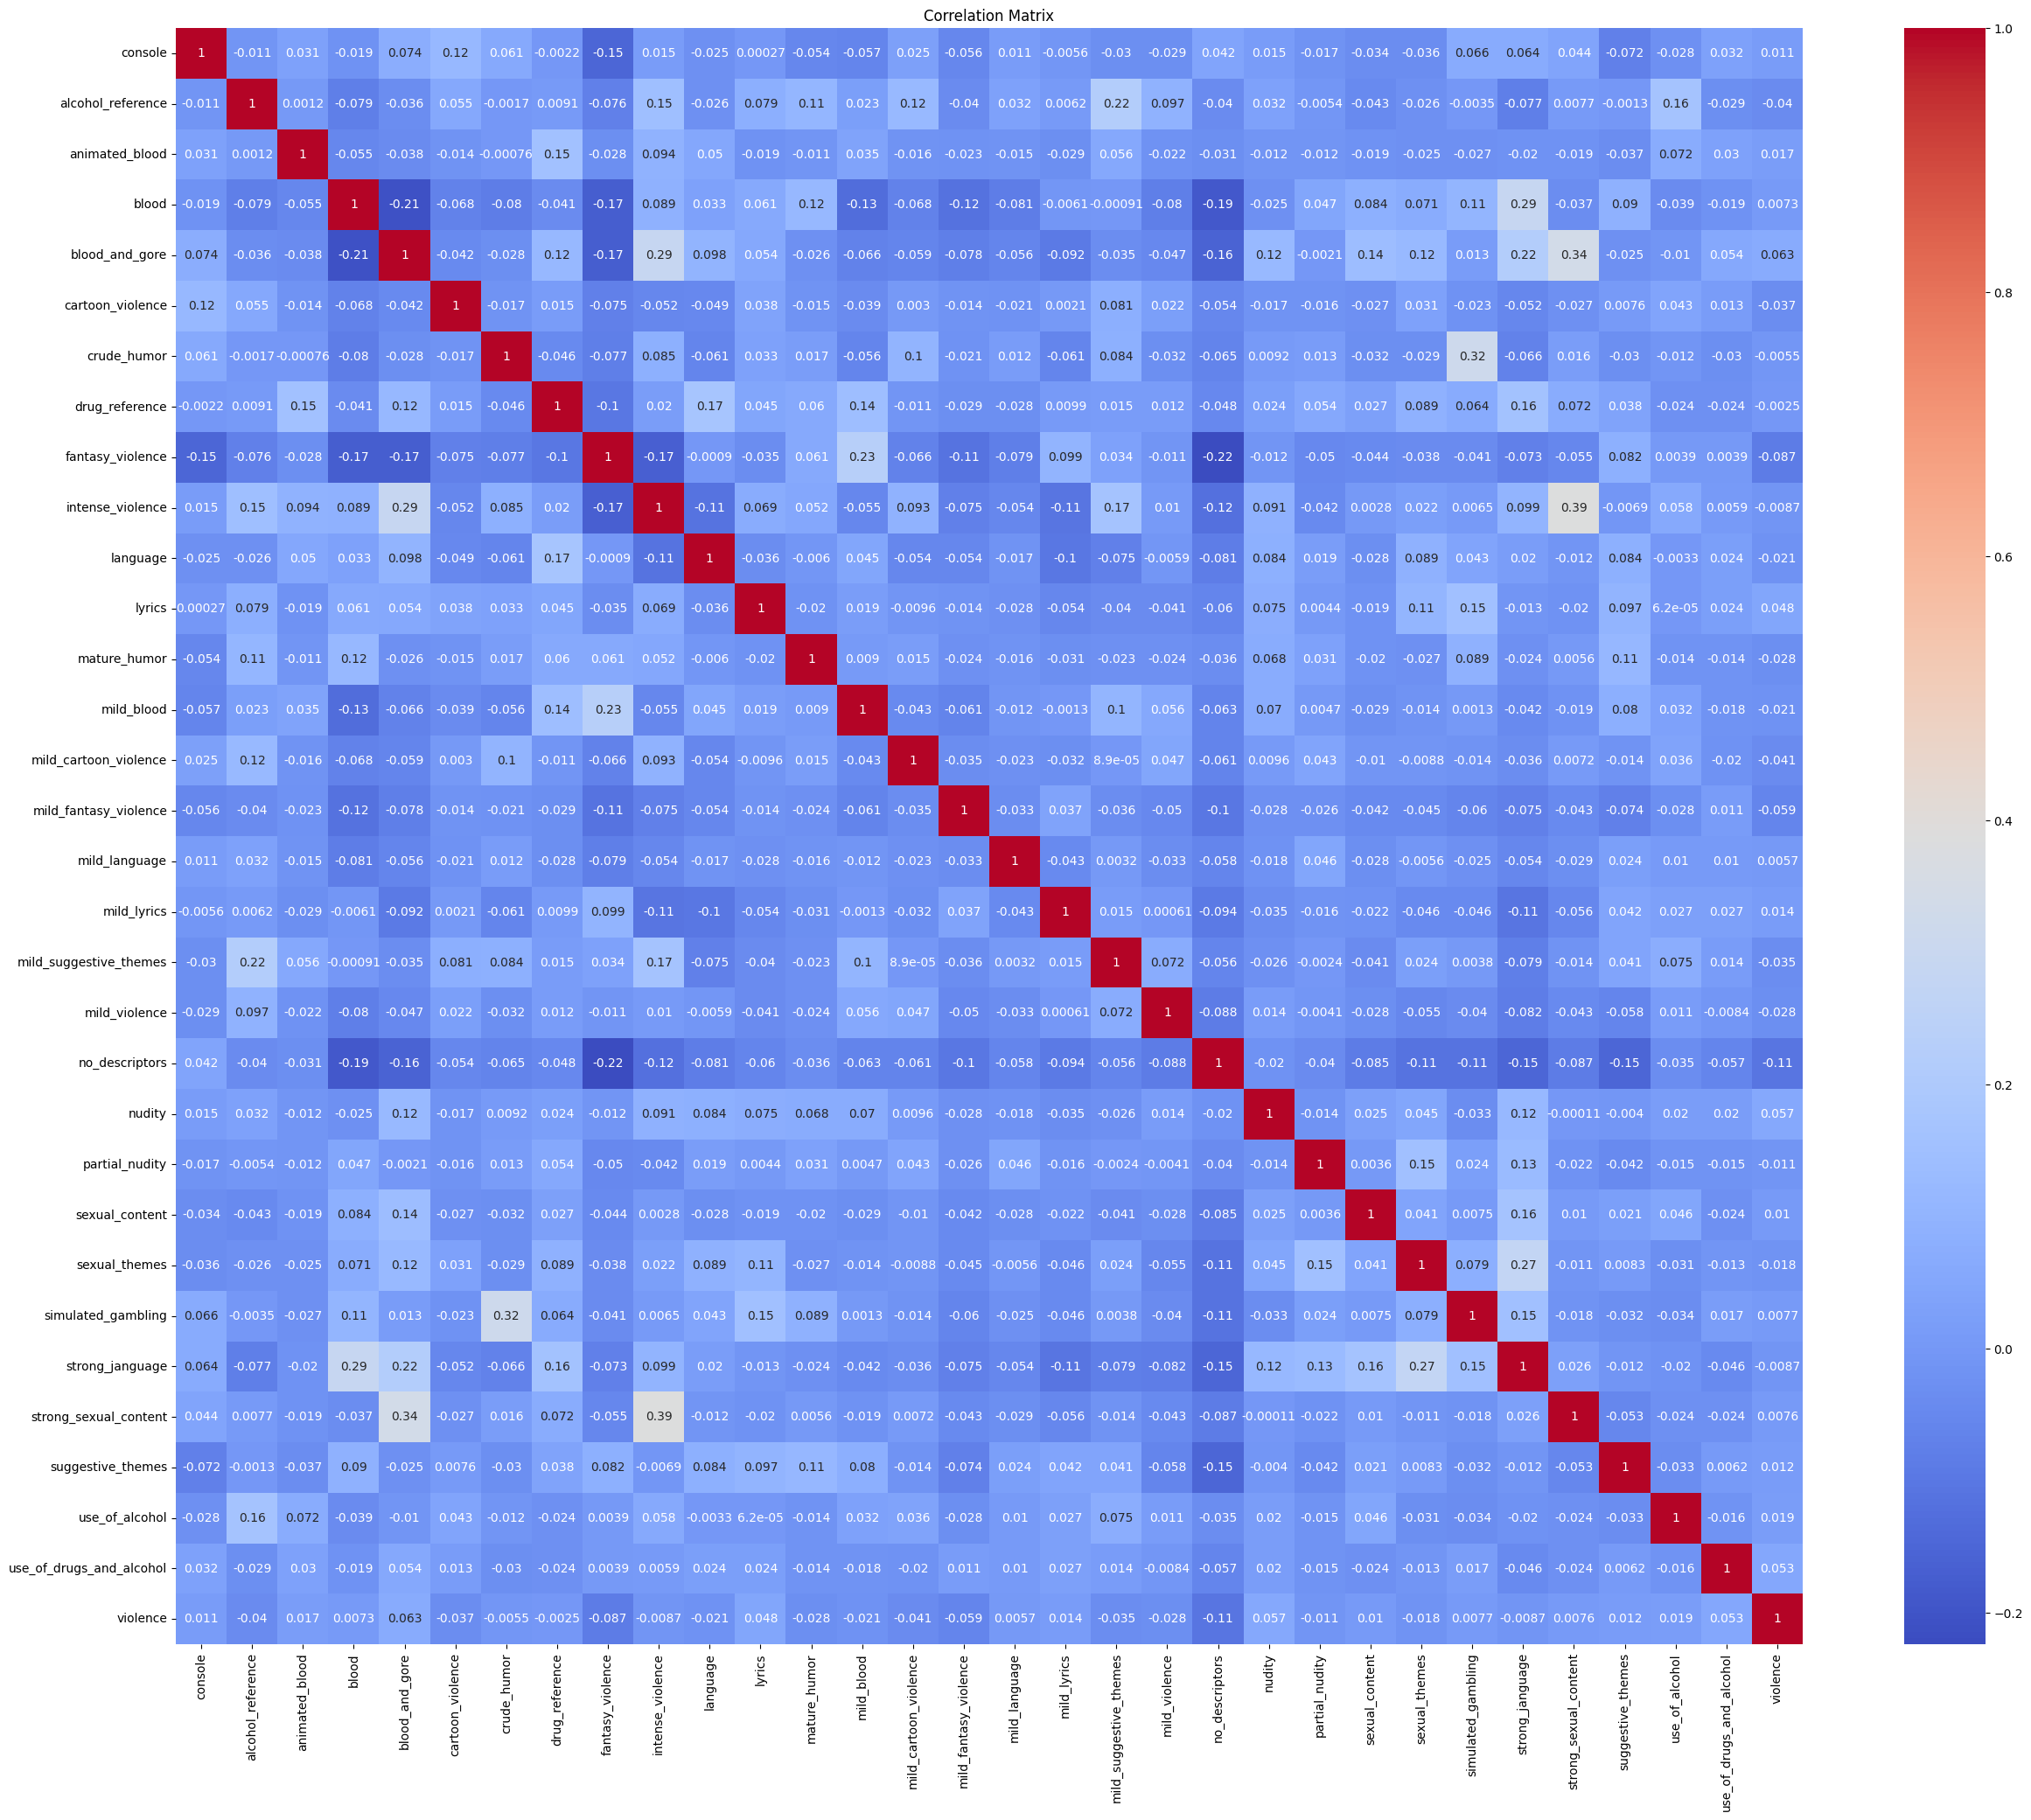

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Q5.How well can the ESRB rating be predicted based on the presence of different content features? Can you build a classification model to predict the ESRB rating using the available features and evaluate its performance using appropriate metrics?


# Patterns in the relationship between ESRB ratings and content features

In [ ]:
rating_combinations = df.groupby(content_features)['esrb_rating'].value_counts().unstack().fillna(0)
print("Combinations of content features in different ESRB ratings:\n", rating_combinations)

# Classification model to predict ESRB rating
# Prepare the data for classification

In [ ]:
X = df[content_features]
y = df['esrb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier

In [ ]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set

In [ ]:
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Summary of the project

The project aimed to explore the relationship between content features and ESRB ratings, identify patterns, and build a classification model to predict the ESRB rating based on the available features. The analysis and classification model provided insights into the relationship between game content and rating, as well as the ability to predict the rating category based on content features.